## Temporal Difference Learning (Q-learning algorithm / SARSA)

For SARSA, the update equation is different because it is an on-policy, model-free Temporal Difference (TD) method, rather than a Monte Carlo method. The SARSA update equation is:

$Q(s, a) = Q(s, a) + α * (R + γ * Q(s', a') - Q(s, a))$

where:

Q(s, a) is the action-value function for state s and action a.  
α is the step-size parameter (learning rate).  
R is the immediate reward after taking action a in state s.  
γ is the discount factor.  
Q(s', a') is the action-value function for the next state s' and next action a', chosen using the same policy.  

Comparison:  

$Q(s, a) = Q(s, a) + α * (G - Q(s, a))$

MC methods update the Q-values based on the return G, which is the sum of discounted rewards in an entire episode, whereas SARSA updates the Q-values based on the immediate reward and the estimated Q-value of the next state-action pair (Q(s', a')).

MC methods update the Q-values after each episode, whereas SARSA updates the Q-values at each time step during the episode.

MC methods are sample-based but don't use bootstrapping (i.e., they don't update based on the current estimate of the value function), whereas SARSA is a bootstrapping method, as it updates the Q-values using the current estimate of the value function Q(s', a').

In [ ]:
import gym
from gym import wrappers

# from __future__ import annotations

from collections import defaultdict
from typing import Tuple

import numpy as np
from IPython import display
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline


from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

is_ipython = 'inline' in plt.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

### The blackjack gym

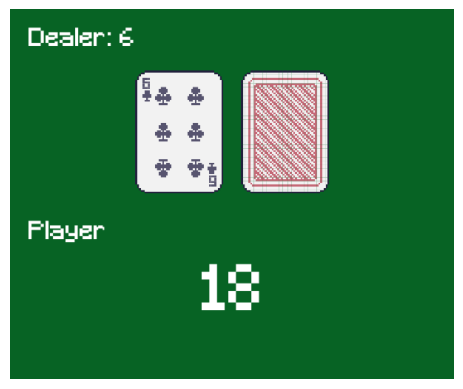

In [ ]:
# env = gym.make("CartPole-v1",render_mode='rgb_array')

env = gym.make('Blackjack-v1',render_mode='rgb_array')

for episode in range(10):
    state = env.reset()
    done = False
    
    while not done:
        img = plt.imshow(env.render())
        plt.axis('off')
        display.display(plt.gcf())
        display.clear_output(wait=True)
        action = env.action_space.sample()
        observation, reward, done, truncated, info = env.step(action)
        state = observation

env.close()

In [ ]:
class agent:
    rewards = []
    errors = []
    episode = 0
    
    def update(self):
        pass

    def get_action(self):
        pass

    def anneal_epsilon(self, min_epsilon, max_epsilon, decay_rate=0.01):
        self.epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * self.episode)

    def moving_average(self, x, w):
        return np.convolve(x, np.ones(w), 'valid') / w
    
    def plot(self):
        fig, axs = plt.subplots(ncols=2, figsize=(12, 5))
        axs[0].set_title("Average Reward")
        axs[0].plot(list(range(len(self.moving_average(self.rewards,500)))),self.moving_average(self.rewards,500))

        axs[1].set_title("Temporal diff error")
        axs[1].plot(list(range(len(self.moving_average(self.errors,500)))),self.moving_average(self.errors,500))

        plt.tight_layout()
        plt.show()
        

And for the q-learning algorithm the following child class

In [ ]:
class q_learnin_agent(agent):
    def __init__(self, env, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.q_table = defaultdict(lambda: np.zeros(self.env.action_space.n))
        self.episode = 0

    def update(self, state: Tuple[int, int, bool], action: int, reward: int, next_state: Tuple[int, int, bool], done: bool)-> None:
        self.episode += 1
        
        if done:
            temporal_diff = self.alpha * (reward - self.q_table[state][action])
        else:
            temporal_diff = self.alpha * (reward + self.gamma * np.max(self.q_table[next_state]) - self.q_table[state][action])
        
        self.q_table[state][action] += temporal_diff
        self.errors.append(temporal_diff)
        self.anneal_epsilon(0.01, 1, 0.001)
        
    def get_action(self, state: Tuple[int, int, bool]) -> int:
        if np.random.uniform(0, 1) < self.epsilon:
            return self.env.action_space.sample()
        else:
            return np.argmax(self.q_table[state])
        
    def get_q_table(self):
        return self.q_table

In [ ]:
env = gym.make('Blackjack-v1')
env = gym.wrappers.RecordEpisodeStatistics(env, deque_size=num_episodes)
q_agent = q_learnin_agent(env, alpha=0.1, gamma=0.95, epsilon=0.1)
for _ in range(100_000):
    state, trunc = env.reset()
    done = False
    while not done:
        action = q_agent.get_action(state)
        next_state, reward, done, _, info = env.step(action)
        q_agent.update(state, action, reward, next_state, done)
        state = next_state
        q_agent.rewards.append(reward)


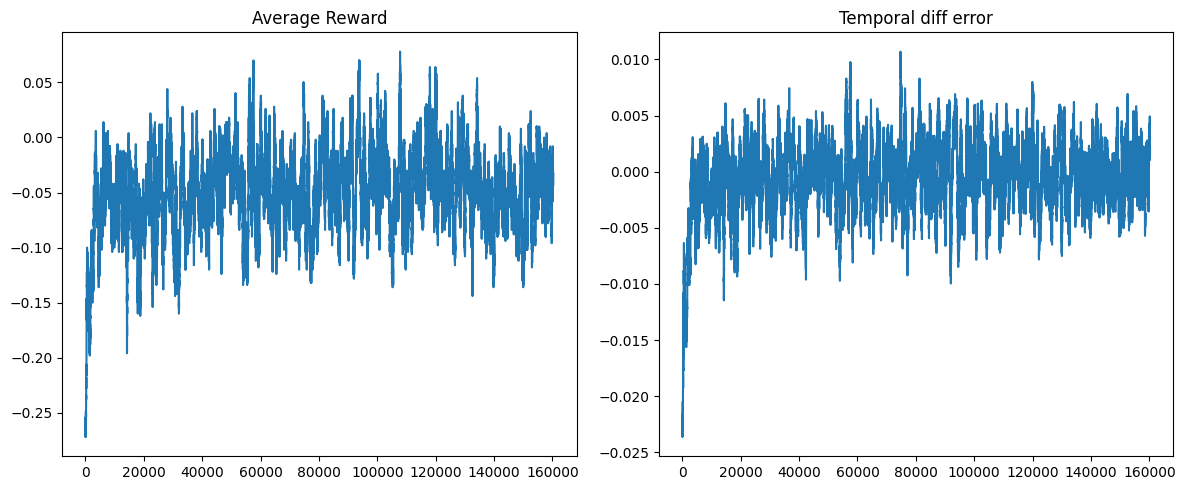

In [ ]:
q_agent.plot()

_Previous result; MC method_

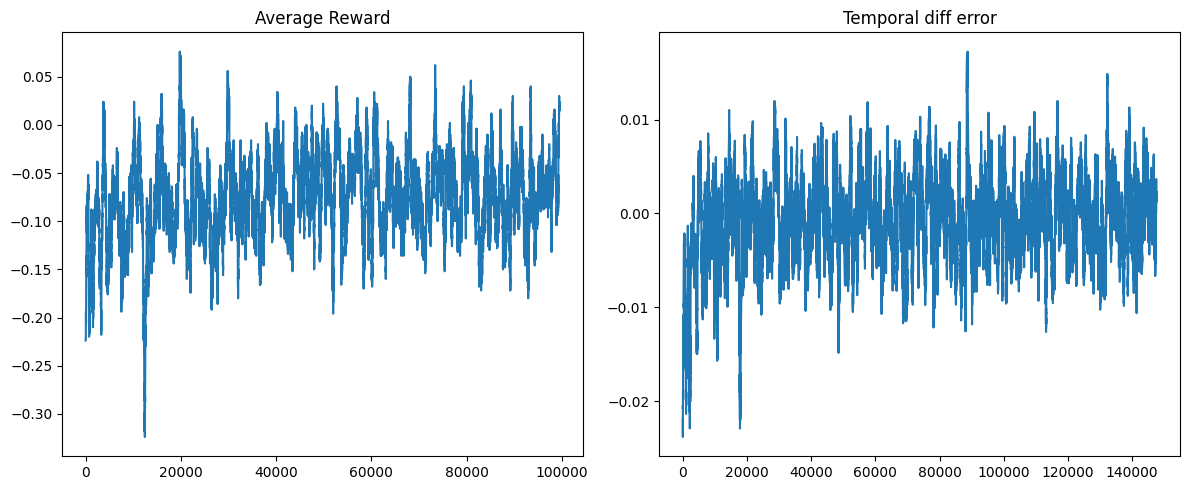